# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Disclaimer:** This notebook was generated by an AI assistant (Minicline) and provides examples of how to access and visualize data from Dandiset 001375. The code and interpretations have not been exhaustively verified by human experts. Please use caution and critically evaluate the results and code before drawing scientific conclusions or reusing the code for your own research.

## Dandiset Overview

*   **Identifier:** DANDI:001375
*   **Version:** draft
*   **Name:** Septum GABA disruption with DREADDs
*   **Description:** Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
*   **Contributors:** Eckert, Michael; NIH Brain; McNaughton, Bruce; Ferbinteanu, Janina
*   **License:** CC-BY-4.0
*   **URL:** [https://dandiarchive.org/dandiset/001375/draft](https://dandiarchive.org/dandiset/001375/draft)

## Notebook Summary

This notebook demonstrates how to:
1.  Connect to the DANDI archive and retrieve metadata about Dandiset 001375.
2.  List the assets (files) within the Dandiset.
3.  Load a specific NWB (Neurodata Without Borders) file from the Dandiset remotely.
4.  Explore the structure and metadata of the loaded NWB file.
5.  Load and visualize different types of data stored within the NWB file, including:
    *   Raw electrophysiology traces
    *   Spike times for identified units
    *   Trial interval information

## Required Packages

This notebook requires the following Python packages. Please ensure they are installed in your environment.

*   `dandi`
*   `pynwb`
*   `h5py`
*   `remfile`
*   `numpy`
*   `matplotlib`
*   `pandas`
*   `seaborn`

## 1. Loading Dandiset Information using DANDI API

We can use the `dandi` Python client to interact with the DANDI Archive programmatically. Here, we'll connect to the client and fetch basic metadata for Dandiset 001375.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
print("Connecting to DANDI API...")
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "draft") # Use draft version
print("Connected.")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"\nDandiset name: {metadata.get('name', 'N/A')}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")
print(f"Dandiset URL: {metadata.get('url', 'N/A')}")

# List the assets in the Dandiset
print("\nListing assets...")
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nAssets:")
for asset in assets:
    asset_info = asset.get_raw_metadata()
    # Use asset.size directly, which is simpler and less prone to type errors from metadata structure
    size_gb = asset.size / (1024**3) if asset.size else 0
    print(f"- Path: {asset.path}")
    print(f"  Asset ID: {asset.identifier}")
    print(f"  Size: {size_gb:.2f} GB")

Connecting to DANDI API...
Connected.

Dandiset name: Septum GABA disruption with DREADDs
Dandiset description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Dandiset URL: https://dandiarchive.org/dandiset/001375/draft

Listing assets...

Found 3 assets in the dataset

Assets:


- Path: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
  Asset ID: ce525828-8534-4b56-9e47-d2a34d1aa897
  Size: 51.20 GB
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
  Asset ID: 376dc673-611b-4521-b135-9ec01c7f4f74
  Size: 64.68 GB
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb
  Asset ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16
  Size: 65.00 GB


## 2. Loading an NWB File Remotely

NWB files can be accessed directly from the DANDI Archive without downloading the entire file first. This is achieved using the `remfile` library in conjunction with `h5py` and `pynwb`.

We will load the following NWB file from the Dandiset:
*   **Path:** `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`
*   **Asset ID:** `ce525828-8534-4b56-9e47-d2a34d1aa897`
*   **URL:** `https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

We use the URL to stream the data.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

# Suppress specific UserWarnings from hdmf/pynwb about cached namespaces if needed
# warnings.filterwarnings("ignore", message="Ignoring cached namespace", category=UserWarning)

# Define the URL for the chosen NWB asset
nwb_url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
asset_path = "sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb"
asset_id = "ce525828-8534-4b56-9e47-d2a34d1aa897"
dandiset_id = "001375"

print(f"Preparing to load NWB file: {asset_path}")
print(f"Streaming from URL: {nwb_url}")

# Use remfile to open the remote HDF5 file stream
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file, 'r') # Read-only mode is recommended

# Use pynwb to read the NWB file structure
# Explicitly set mode='r' for reading
io = pynwb.NWBHDF5IO(file=h5_file, mode='r', load_namespaces=True)
nwb = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")

Preparing to load NWB file: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
Streaming from URL: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Identifier: MS13B
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00


## 3. Exploring the NWB File Structure

The loaded `nwb` object contains various data groups. Based on the file information, we expect to find:

*   **Raw Ephys Data:** Likely under `nwb.acquisition['time_series']`. This contains the continuous voltage recordings from the electrodes.
*   **Electrode Information:** In `nwb.electrodes` (a table with electrode properties like location, group) and `nwb.electrode_groups`.
*   **Trial Information:** In `nwb.intervals['trials']` or `nwb.trials`. This table typically contains start and stop times for experimental trials (e.g., laps).
*   **Sorted Units:** In `nwb.units`. This table usually contains spike times for neurons identified through spike sorting.
*   **Subject Information:** In `nwb.subject`.

You can interactively explore the `nwb` object (e.g., by typing `nwb.` and pressing Tab in a Jupyter environment) or print specific components like `nwb.acquisition`, `nwb.intervals`, `nwb.units`, etc., to see the available data.

### Neurosift Link

You can also explore this NWB file interactively using Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

## 4. Visualizing Data from the NWB File

Let's load and visualize some example data.

### 4.1 Raw Electrophysiology Data

We will load a short snippet of the raw voltage data from the `time_series` acquisition object and plot the traces for a few channels. This helps confirm data access and gives a qualitative look at the signal characteristics.

Accessing raw time series data...
Found 'time_series' with sampling rate: 30000.0 Hz and 256 channels.
Loading data for channels [0, 1, 2] for the first 1.0 seconds...


Data loaded. Shape: (30000, 3)
Generating plot...


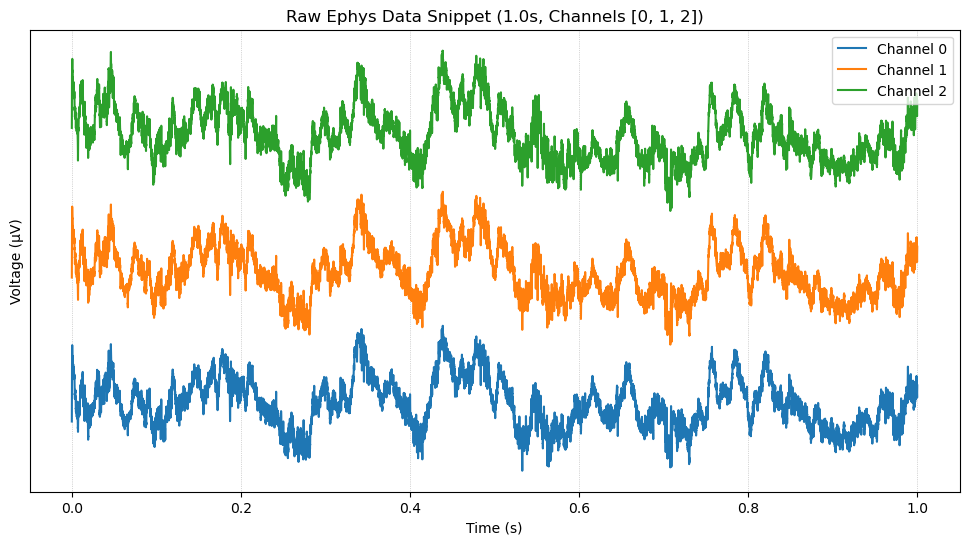

In [3]:
print("Accessing raw time series data...")
if 'time_series' in nwb.acquisition:
    ts = nwb.acquisition['time_series']
    fs = ts.rate  # Sampling rate
    num_channels_total = ts.data.shape[1]
    print(f"Found 'time_series' with sampling rate: {fs} Hz and {num_channels_total} channels.")

    # Define time segment and channels to plot
    duration_seconds = 1.0
    num_samples = int(duration_seconds * fs)
    channel_indices = [0, 1, 2] # Plot the first 3 channels
    channel_indices = [c for c in channel_indices if c < num_channels_total] # Ensure indices are valid

    if channel_indices:
        print(f"Loading data for channels {channel_indices} for the first {duration_seconds} seconds...")
        # Load data snippet (samples, channels)
        data_snippet = ts.data[:num_samples, channel_indices]

        # Apply conversion factor (e.g., from volts to microvolts)
        conversion_factor = ts.conversion if ts.conversion is not None and ts.conversion != 0 else 1.0
        offset = ts.offset if ts.offset is not None else 0.0
        y_label = f'Amplitude ({ts.unit})'
        data_snippet_converted = (data_snippet.astype(np.float64) * conversion_factor) + offset


        # Infer appropriate unit scaling (e.g., show uV if original is V or mV)
        if ts.unit.lower() in ['volts','v']:
            data_snippet_converted *= 1e6
            y_label = 'Voltage (µV)'
        elif ts.unit.lower() in ['millivolts', 'mv']:
            data_snippet_converted *= 1e3
            y_label = 'Voltage (µV)'
        # else: keep original unit

        print("Data loaded. Shape:", data_snippet_converted.shape)

        # Create time vector
        time_vector = np.arange(num_samples) / fs

        print("Generating plot...")
        # Plot the data
        fig, ax = plt.subplots(figsize=(12, 6))
        for i, ch_index in enumerate(channel_indices):
            # Offset traces for visibility
            trace_offset = i * np.std(data_snippet_converted[:, i]) * 5 # Adjust offset based on std dev
            ax.plot(time_vector, data_snippet_converted[:, i] + trace_offset, label=f'Channel {ch_index}')

        ax.set_xlabel('Time (s)')
        ax.set_ylabel(y_label)
        ax.set_title(f'Raw Ephys Data Snippet ({duration_seconds}s, Channels {channel_indices})')
        ax.legend(loc='upper right')
        ax.grid(True, axis='x', linestyle=':', linewidth=0.5)
        # Improve y-axis formatting - remove constant offset visualization
        ax.get_yaxis().set_ticks([])
        plt.show()
    else:
        print("No valid channel indices selected or available to plot.")

else:
    print("Raw 'time_series' not found in nwb.acquisition.")

### 4.2 Spike Times Data

The `nwb.units` table contains spike times for units identified through spike sorting. We can load this table into a pandas DataFrame and visualize the firing patterns using a raster plot. We'll plot the spikes for the first few units over a short time interval.

Accessing units data...


Units table loaded with 33 units.
Units table head:
                                          spike_times
id                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...
2   [0.1826, 0.21976666666666667, 0.77823333333333...
3   [0.005533333333333334, 0.01633333333333333, 0....
4   [0.5452333333333333, 0.5632, 0.572833333333333...
5   [0.07036666666666666, 0.1002, 0.17066666666666...

Preparing spike times for units [1, 2, 3, 4, 5] up to 60.0s...

Generating raster plot for 5 units...


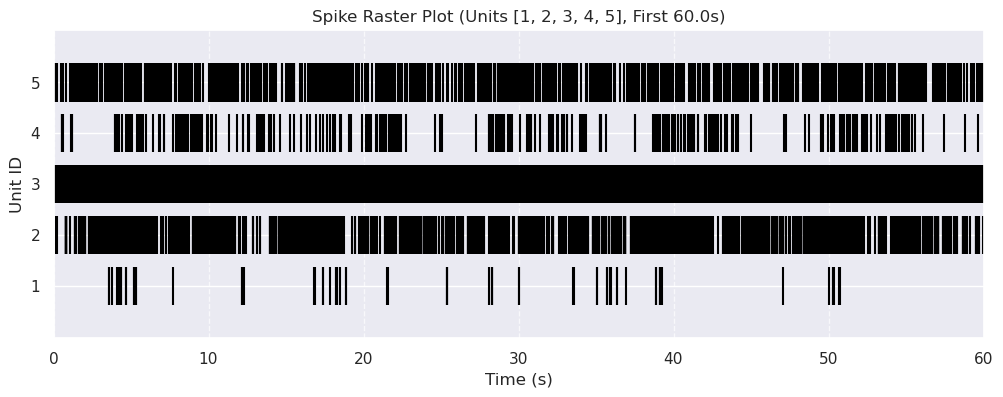

In [4]:
print("Accessing units data...")
if hasattr(nwb, 'units') and nwb.units is not None:
    units_df = nwb.units.to_dataframe()
    print(f"Units table loaded with {len(units_df)} units.")
    print("Units table head:")
    print(units_df.head())

    # Define units and time range for raster plot
    num_units_to_plot = min(5, len(units_df)) # Plot first 5 units or fewer
    unit_ids = units_df.index[:num_units_to_plot]
    time_limit_seconds = 60.0 # Plot spikes within the first 60 seconds

    print(f"\nPreparing spike times for units {list(unit_ids)} up to {time_limit_seconds}s...")
    spike_times_list = []
    actual_unit_ids_plotted = []

    # Iterate through selected unit IDs and get spike times within the time limit
    for unit_id in unit_ids:
        # Access spike times for the current unit
        if 'spike_times' in units_df.columns:
            unit_spike_times = units_df.loc[unit_id, 'spike_times']
            # Filter spike times
            filtered_spike_times = unit_spike_times[unit_spike_times <= time_limit_seconds]

            if len(filtered_spike_times) > 0:
                spike_times_list.append(filtered_spike_times)
                actual_unit_ids_plotted.append(unit_id)
            else:
                print(f"Unit {unit_id} has no spikes before {time_limit_seconds}s. Skipping.")
        else:
            print(f"Column 'spike_times' not found for unit {unit_id}")
            break # Stop if column is missing

    if not spike_times_list:
        print("\nNo spike times found for the selected units in the specified time range. Cannot generate raster plot.")
    else:
        print(f"\nGenerating raster plot for {len(spike_times_list)} units...")
        # Use seaborn styling for better aesthetics
        sns.set_theme()

        # Plot the raster
        fig, ax = plt.subplots(figsize=(12, 4))
        ax.eventplot(spike_times_list, linelengths=0.75, colors='black')

        ax.set_xlabel('Time (s)')
        ax.set_yticks(range(len(actual_unit_ids_plotted))) # Positions for y-ticks
        ax.set_yticklabels(actual_unit_ids_plotted) # Label y-ticks with actual unit IDs
        ax.set_ylabel('Unit ID')
        ax.set_title(f'Spike Raster Plot (Units {actual_unit_ids_plotted}, First {time_limit_seconds}s)')
        ax.set_xlim(0, time_limit_seconds)
        ax.grid(axis='x', linestyle='--', alpha=0.7) # Add vertical grid lines

        plt.show()
else:
    print("No 'units' table found in the NWB file.")

### 4.3 Trial Information

Experimental trials (like behavioral epochs or stimulus presentations) are often stored in `TimeIntervals` tables. Let's examine the `trials` table, which, based on the session description ("mouse running laps in virtual hallway"), likely contains lap times. We'll calculate the duration of each trial (lap) and plot a histogram to see their distribution.

Accessing trial data...
Found 'trials' table in nwb.intervals.
Converted trials table to DataFrame with 387 trials.
Trials DataFrame head:
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467

Calculated trial durations.
Generating histogram of trial durations...


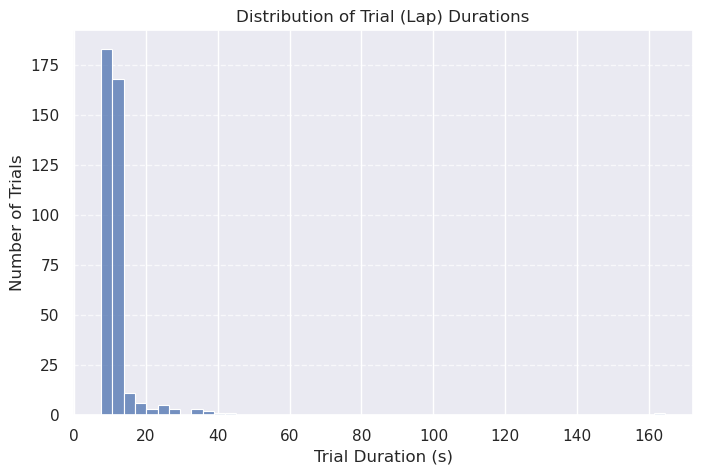

In [5]:
print("Accessing trial data...")
# Check in nwb.intervals first, then fall back to nwb.trials if necessary
trials_table = None
if 'trials' in nwb.intervals:
    trials_table = nwb.intervals['trials']
    print("Found 'trials' table in nwb.intervals.")
elif hasattr(nwb, 'trials') and nwb.trials is not None:
     trials_table = nwb.trials
     print("Found 'trials' table directly under nwb object.")

if trials_table is not None:
    # Convert to DataFrame
    trials_df = trials_table.to_dataframe()
    print(f"Converted trials table to DataFrame with {len(trials_df)} trials.")
    print("Trials DataFrame head:")
    print(trials_df.head())

    # Calculate trial durations if columns exist
    if 'start_time' in trials_df.columns and 'stop_time' in trials_df.columns:
        trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']
        print("\nCalculated trial durations.")

        # Plot histogram of durations
        print("Generating histogram of trial durations...")
        sns.set_theme() # Use seaborn styling
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.histplot(trials_df['duration'], ax=ax, kde=False, bins=50) # Use more bins for potentially skewed data

        ax.set_xlabel('Trial Duration (s)')
        ax.set_ylabel('Number of Trials')
        ax.set_title('Distribution of Trial (Lap) Durations')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("\nCould not find 'start_time' or 'stop_time' columns in trials DataFrame.")

else:
    print("\nNo 'trials' interval table found in the NWB file.")

## 5. Summary and Future Directions

This notebook demonstrated how to access Dandiset 001375 using the DANDI API and load a specific NWB file (`sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`) for analysis. We successfully visualized snippets of:
*   Raw electrophysiological data, showing voltage fluctuations over time.
*   Spike times for several sorted units via a raster plot, revealing distinct firing patterns.
*   Trial durations, illustrating the distribution of lap times in the experiment.

This provides a foundation for exploring the dataset. Potential next steps could include:
*   Analyzing neural activity relative to trial start/stop times.
*   Calculating firing rates for different units.
*   Performing spectral analysis on the raw LFP data.
*   Comparing activity across different electrode locations (using `nwb.electrodes` information).
*   Loading and analyzing data from the other NWB files in the Dandiset.
*   Correlating neural activity with any available behavioral data (if present in the NWB file, although not explicitly explored here).

In [6]:
# Clean up and close the NWB file resources
try:
    io.close()
    # remfile doesn't usually require explicit closing, relies on garbage collection
    # if hasattr(remote_file, 'close'): remote_file.close()
    print("\nNWB file resources closed.")
except Exception as e:
    print(f"\nError closing NWB file resources: {e}")


NWB file resources closed.
